# IMDB Movie Analysis

1. Importing libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Importing the CSV file to a dataframe

In [18]:
df = pd.read_csv('IMDB_Movies.csv')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


3. Cleaning the data

* Determining null values in the dataframe

In [19]:
df.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
language                      14
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

* Removing null values

In [20]:
df.dropna(inplace=True)

* Checking for duplicate values
* If there is any then removing it

In [21]:
df.duplicated().sum()

33

> 33 duplicate rows to be removed

In [22]:
df.drop_duplicates(inplace=True)

* Determinig the irrelevant columns and removing them

In [23]:
df.keys()

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [24]:
df=df.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
            'actor_3_facebook_likes','cast_total_facebook_likes',
            'duration','facenumber_in_poster','content_rating','country','movie_imdb_link',
            'aspect_ratio','plot_keywords'],axis=1)

In [25]:
df.keys()

Index(['director_name', 'num_critic_for_reviews', 'actor_2_name', 'gross',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

4. Analysis:
    * Movies with highest profit
    * Top 250 movies
    * Best Directors
    * Popular Genres
    * Charts

* Movies with highest profit
    * creating a new column "profit"
    * profit = gross - budget

In [26]:
df['profit']=df['gross']-df['budget']

In [36]:
top10=df.sort_values(by='profit',ascending=False).head(10)
top10

,director_name,num_critic_for_reviews,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
29,Colin Trevorrow,644.0,Judy Greer,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,Omar Sy,1290,English,150000000.0,2015.0,7.0,150000,502177271.0
26,James Cameron,315.0,Kate Winslet,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,Gloria Stuart,2528,English,200000000.0,1997.0,7.7,26000,458672302.0
3024,George Lucas,282.0,Peter Cushing,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,Kenny Baker,1470,English,11000000.0,1977.0,8.7,33000,449935665.0
3080,Steven Spielberg,215.0,Dee Wallace,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,Peter Coyote,515,English,10500000.0,1982.0,7.9,34000,424449459.0
17,Joss Whedon,703.0,Robert Downey Jr.,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,Scarlett Johansson,1722,English,220000000.0,2012.0,8.1,123000,403279547.0
509,Roger Allers,186.0,Nathan Lane,422783777.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,Niketa Calame,656,English,45000000.0,1994.0,8.5,17000,377783777.0
240,George Lucas,320.0,Liam Neeson,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,Ian McDiarmid,3597,English,115000000.0,1999.0,6.5,13000,359544677.0
66,Christopher Nolan,645.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,4667,English,185000000.0,2008.0,9.0,37000,348316061.0
439,Gary Ross,673.0,Josh Hutcherson,407999255.0,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,Anthony Reynolds,1959,English,78000000.0,2012.0,7.3,140000,329999255.0


In [38]:
top10.to_csv("Top 10 movies with highest profit.csv")

* * finding the outliers

In [48]:
df['profit'].sort_values().head(5)

2988   -1.221330e+10
3859   -4.199788e+09
3005   -2.499804e+09
2323   -2.397702e+09
2334   -2.127110e+09
Name: profit, dtype: float64

* * Box Plot

<Axes: >

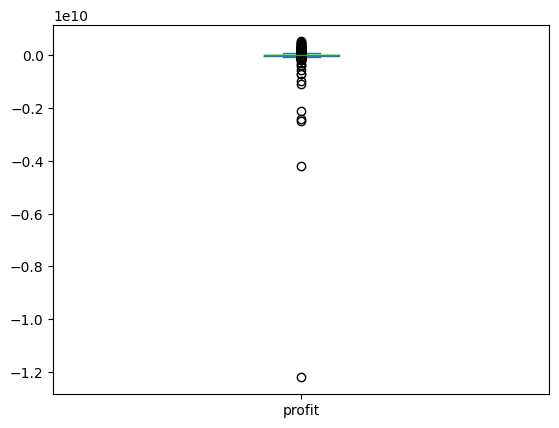

In [40]:
df['profit'].plot(kind='box')

* * Scatter plot

<Axes: xlabel='gross', ylabel='profit'>

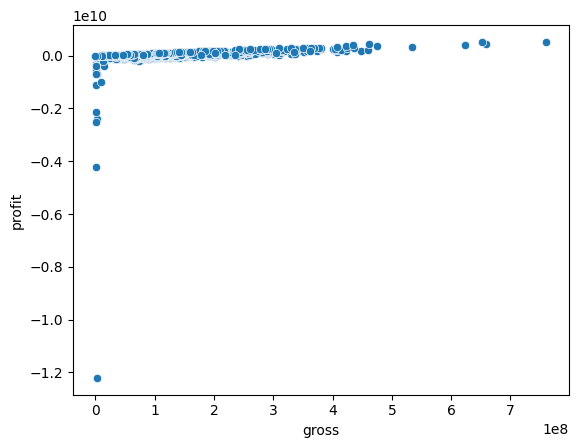

In [44]:
sns.scatterplot(x=df['gross'], y=df['profit'])